In [ ]:
# import libraries
# set up gcfs connection
# pull in data
# run analysis

In [20]:
from google.cloud import storage
from google.oauth2 import service_account

import geopandas as gpd
import os
from pathlib import Path
from io import BytesIO

# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()

True

In [21]:
# Get credentials path from environment
credentials_path = Path(os.getenv('GOOGLE_APPLICATION_CREDENTIALS'))

# Initialize client with credentials and project from environment
credentials = service_account.Credentials.from_service_account_file(
    str(credentials_path)
)
client = storage.Client(
    credentials=credentials, 
    project=os.getenv('GOOGLE_CLOUD_PROJECT')
)

# Get bucket name from environment
bucket_name = os.getenv('GOOGLE_CLOUD_BUCKET')
bucket = client.bucket(bucket_name)

In [22]:
# List objects in the bucket
print(f"Listing objects in {bucket_name}:")
blobs = list(bucket.list_blobs(max_results=10))
for blob in blobs:
    print(f"- {blob.name}")

Listing objects in ciut-tablero:
- 2023/
- 2023/MAPAS/LP_Riesgo Hidrico.jpeg
- 2023/MAPAS/LP_Riesgo Hidrico.pdf
- 2023/MAPAS/LP_Vulnerabilidad-Sintesis.jpeg
- 2023/MAPAS/LP_Vulnerabilidad-Sintesis.pdf
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Exposicion.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Riesgo.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Vulnerabilidad ambiental.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Vulnerabilidad socieconomica.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Vulnerabilidad.jpeg


In [12]:
# List all blobs in the 2024 directory
prefix = "2024/"
print(f"Searching for GIS files in {prefix}...")

# Get all blobs with the prefix
blobs = bucket.list_blobs(prefix=prefix)

# Filter for GIS files
gis_files = []
for blob in blobs:
    if blob.name.lower().endswith((".shp", ".geojson", ".json")):
        gis_files.append(blob.name)

# Print results
if gis_files:
    print("\nFound GIS files:")
    for file in gis_files:
        print(f"- {file}")
else:
    print("\nNo GIS files found in 2024 directory")

Searching for GIS files in 2024/...

Found GIS files:
- 2024/R25_Riesgo_Rural.geojson
- 2024/R25_Riesgo_Urbano.geojson
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/Cuenca_Maldonado_v9b_smooth5.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/Dominio_2.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/H_100_cauces.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/H_25_cauces.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/S_100_cauces.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/S_25_cauces.shp
- 2024/archivos en JSON/JSON_Anteriores/R100_Riesgo_Rural.geojson
- 2024/archivos en JSON/JSON_Anteriores/R100_Riesgo_Urbano.geojson
- 2024/archivos en JSON/JSON_Anteriores/R100_peligrosidad.geojson
- 2024/archivos en JSON/JSON_Anteriores/R100_riesgo.geojson
- 2024/archivos en JSON/JSON_Anteriores/R25_peligrosidad.geojson
- 2024/archivos en JSON/JSON_Anteriores/R25_riesgo.geojson


In [23]:
riesgo_rural_blob = bucket.blob("2024/R25_Riesgo_Rural.geojson")
riesgo_rural_content = riesgo_rural_blob.download_as_bytes()
riesgo_rural = gpd.read_file(BytesIO(riesgo_rural_content))

In [16]:
riesgo_rural.head()

,fid,link,PROV,DEPTO,CODLOC,FRAC,RADIO,MZA,ambiental,fisica,socioeco,exposicion,vulnerab,densidad,peli,riesgo,geometry
0,1,064414111,06,441,441,41,11,006,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411861.621 6128538.962, 64117..."
1,2,064414111,06,441,441,41,11,005,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411729.336 6128678.183, 64117..."
2,3,064414111,06,441,441,41,11,007,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411841.116 6128517.533, 64118..."
3,4,064414111,06,441,441,41,11,003,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411534.911 6129308.313, 64115..."
4,5,064414111,06,441,441,41,11,005,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411569.073 6128799.481, 64118..."


<Axes: >

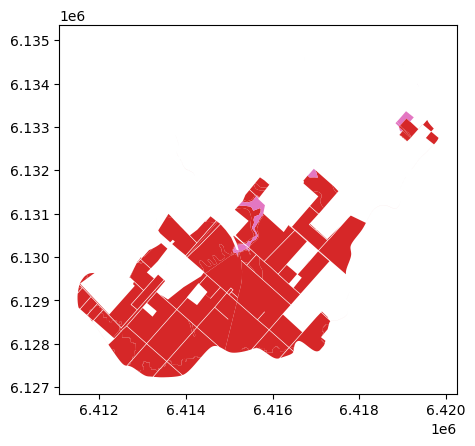

In [17]:
riesgo_rural.plot("riesgo")

In [24]:
riesgo_urbano_blob = bucket.blob("2024/R25_Riesgo_Urbano.geojson")
riesgo_urbano_content = riesgo_urbano_blob.download_as_bytes()
riesgo_urbano = gpd.read_file(BytesIO(riesgo_urbano_content))

In [25]:
riesgo_urbano.head()

,fid,link,PROV,DEPTO,CODLOC,FRAC,RADIO,MZA,ambiental,fisica,socioeco,exposicion,vulnerab,densidad,peli,riesgo,geometry
0,1,064416817,06,441,441,68,17,011,1,0,0,1,2,0.17,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6412327.673 6128148.009, 64123..."
1,2,064413714,06,441,441,37,14,001,2,2,1,2,7,4.19,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411562.387 6129389.394, 64116..."
2,3,064413714,06,441,441,37,14,011,2,2,1,2,7,4.19,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6412810.718 6129745.449, 64128..."
3,4,064413714,06,441,441,37,14,010,2,2,1,2,7,4.19,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6412879.468 6129882.172, 64128..."
4,5,064413714,06,441,441,37,14,015,2,2,1,2,7,4.19,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6413362.402 6129595.31, 641367..."


<Axes: >

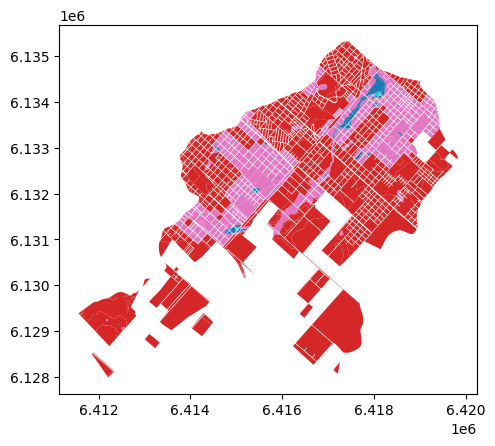

In [26]:
riesgo_urbano.plot('riesgo')

In [ ]:
# pull in peligrosidad
# pull in population data points
# pull in vulnerability data points
# calculate summary stats per cuenca (will need cuenca data)

# OPTIONAL: dasymmetric mapping with GHSL landcover
# (choose GHSL because can be combined with historic census data back to 1990)